# Proyecto Análisis de eficiencia operativa en la empresa telefónica CallMeMaybe

# Link Dashboard 

https://public.tableau.com/app/profile/aim.e.dom.nguez/viz/ProyectofinalSprint14DashboardMonitordeOperadoresyComportamientodeLlamadas/Dashboard1#1

# Link Presentación del Proyecto

https://drive.google.com/file/d/1wNZYSlIfECnsNkAlxUJPQMF8N_H7LzuA/view?usp=drive_link

# Tabla de contenido
1. [Introducción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Preparación de  datos](#Preparación-de-datos)
5. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-(EDA)))
6. [Definición de Ineficacia](#Definición-de-Ineficacia)
7. [Prueba de Hipótesis Estadísticas](#Prueba-de-Hipótesis-Estadísticas)
8. [Conclusiones y recomendaciones](#Conclusiones-y-recomendaciones)
9. [Fuentes Consultadas](#Fuentes-Consultadas)

# Introducción al Proyecto 
La empresa CallMeMaybe busca mejorar la calidad de su servicio de telefonía virtual al identificar operadores ineficaces dentro de sus equipos. Un operador ineficaz se caracteriza por altos niveles de ineficiencia, como grandes cantidades de llamadas perdidas (entrantes e internas), tiempos de espera prolongados y, en el caso de operadores asignados a realizar llamadas salientes, bajos volúmenes de dichas llamadas. Este análisis tiene como objetivo proporcionar información clave que permita a los supervisores optimizar el desempeño de los operadores, mejorando la experiencia de los clientes finales.

A través de un análisis exhaustivo de los datos históricos proporcionados por CallMeMaybe, se identificarán patrones y métricas clave para evaluar la eficacia de los operadores. Esto permitirá realizar un diagnóstico preciso de las áreas dmee jo mejora y respaldar decisiones estratégicas basadas en evidencias.os

# Objetivos específicos

**1.Realizar un análisis exploratorio de datos (EDA)** para comprender las características principales de las llamadas y operadores dentro de la red CallMeMaybe.

**2.Identificar operadores ineficaces** basándose en métricas clave como cantidad de llamadas perdidas, tiempos de espera prolongados y número insuficiente de llamadas salientes (cuando aplique).

**3.Validar hipótesis estadísticas** sobre factores relacionados con la eficacia de los operadores, como la relación entre tiempos de espera y llamadas perdidas, o la influencia de las características del cliente en la distribución de las llamadas.

# Etapas de análisis del proyecto

**1.Preparación de Datos**

Importar librerías necesarias para ejecutar el proyecto y los datasets requeridos (telecom_dataset_us.csv y telecom_clients_us.csv).

El conjunto de datos ('telecom_dataset_us.csv') contiene las siguientes columnas:
- 'user_id': ID de la cuenta de cliente
- 'date': fecha en la que se recuperaron las estadísticas
- 'direction': "dirección" de llamada (`out` para saliente, `in` para entrante)
- 'internal': si la llamada fue interna (entre los operadores de un cliente o clienta)
- 'operator_id': identificador del operador
- 'is_missed_call': si fue una llamada perdida
- 'calls_count': número de llamadas
- 'call_duration': duración de la llamada (sin incluir el tiempo de espera)
- 'total_call_duration': duración de la llamada (incluido el tiempo de espera)

El conjunto de datos ('telecom_clients_us.csv') tiene las siguientes columnas:

- 'user_id': ID de usuario/a
- 'tariff_plan': tarifa actual de la clientela
- 'date_start': fecha de registro de la clientla

**2.Análisis Exploratorio de Datos (EDA)**

Identificar valores nulos, duplicados y realizar la limpieza de datos.
Estandarizar formatos de columnas (fechas, categorías, IDs).
Describir las principales métricas de los operadores: número total de llamadas, promedio de duración, tiempo de espera, porcentaje de llamadas perdidas.
Identificar patrones generales, como la distribución de llamadas por operador.

**3.Definición de Ineficacia**

Definir umbrales claros para determinar la ineficacia de un operador:
Porcentaje de llamadas perdidas alto (>X%).
Tiempo promedio de espera elevado (>X segundos).
Volumen bajo de llamadas salientes para operadores asignados a esta tarea.
Agrupar operadores con base en su desempeño.

**4.Prueba de Hipótesis Estadísticas**

Evaluar si los tiempos de espera influyen en el porcentaje de llamadas perdidas.
Analizar si las características del cliente (plan tarifario, antigüedad) afectan el desempeño de los operadores.

**5.Conclusiones y recomendaciones del Proyecto Final**

Conclusiones del Proyecto y estrategias para mejorar el desempeño general de los operadores.

**6.Fuentes Consultadas**

Documentación, artículos, reportes que sustenten el proyecto.

**7.Visualización y Reporte**

Generar gráficos y tablas para ilustrar las métricas clave y los resultados del análisis, hacer un dashboard.
Crear una presentación en PDF del Proyecto Final.


# Preparación de  datos

**Inicialización**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

**Cargar los datos**

In [2]:
clientes = pd.read_csv('telecom_clients_us.csv')

In [3]:
dataset = pd.read_csv('telecom_dataset_us.csv')

# Análisis Exploratorio de Datos (EDA)

**Conjunto de datos: clientes**

In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
clientes.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [6]:
clientes.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [7]:
clientes.duplicated().sum()

0

In [8]:
clientes['date_start'] = pd.to_datetime(clientes['date_start'], format = '%Y-%m-%d')

In [9]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [10]:
clientes.describe()

,user_id,date_start
count,732.000000,732
mean,167431.927596,2019-09-14 16:39:20.655737600
min,166373.000000,2019-08-01 00:00:00
25%,166900.750000,2019-08-23 00:00:00
50%,167432.000000,2019-09-16 00:00:00
75%,167973.000000,2019-10-08 00:00:00
max,168606.000000,2019-10-31 00:00:00
std,633.810383,NaN


**Conjunto de datos: dataset**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [12]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  float64                  
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


In [14]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


**Datos nulos**

In [15]:
dataset.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

**Columna internal**

In [16]:
internal_nulos = dataset[dataset['internal'].isnull()]

In [17]:
print("Distribución de 'direction' para valores nulos en 'internal':")
print(internal_nulos['direction'].value_counts())

Distribución de 'direction' para valores nulos en 'internal':
direction
in     115
out      2
Name: count, dtype: int64


Traté de inferir si los valores nulos de la columna 'internal' con los valores de la columna 'direction', si el valor en 'direction' era in (llamada entrante) no se considera llamada interna, de los 117 valores nulos 115 son in por lo cual no son llamadas internas, por lo cual consideré imputar los valores nulos como False ya que al no ser una cantidad considerable es poco probable que afecte el análisis.

In [18]:
dataset['internal'] = dataset['internal'].fillna(False).astype(bool)

C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_24296\3337664992.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['internal'] = dataset['internal'].fillna(False).astype(bool)


In [19]:
dataset.isna().sum()

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

**Columna operator_id**

In [20]:
missing_operator_data = dataset[dataset['operator_id'].isnull()]

In [21]:
missed_call_count = missing_operator_data['is_missed_call'].sum()

In [22]:
total_missing_operator = missing_operator_data.shape[0]
proportion_missed_calls = missed_call_count / total_missing_operator

In [23]:
print(f"Total de valores nulos en operator_id: {total_missing_operator}")
print(f"Total de llamadas perdidas entre esos valores nulos: {missed_call_count}")
print(f"Proporción de llamadas perdidas: {proportion_missed_calls:.2%}")

Total de valores nulos en operator_id: 8172
Total de llamadas perdidas entre esos valores nulos: 8050
Proporción de llamadas perdidas: 98.51%


El porcentaje de valores nulos que están relacionados con llamadas perdidas es de 98.51%, las cuales no están vinculadas a un operador específico por lo cual consideré eliminarlos. 

In [24]:
dataset_cleaned = dataset.dropna(subset=['operator_id'])

In [25]:
print(dataset_cleaned['operator_id'].isnull().sum())

0


In [26]:
dataset_cleaned.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

**Datos duplicados**

In [27]:
dataset_cleaned.duplicated().sum()

4184

In [28]:
duplicados_totales = dataset_cleaned[dataset_cleaned.duplicated()]

In [29]:
columnas_a_excluir = ['date', 'user_id', 'operator_id']
columnas_para_comparar = [col for col in dataset_cleaned.columns if col not in columnas_a_excluir]

In [30]:
duplicados_reales = dataset_cleaned[dataset_cleaned.duplicated(subset=columnas_para_comparar)]

In [31]:
print(f"Duplicados totales: {len(duplicados_totales)}")
print(f"Duplicados reales: {len(duplicados_reales)}")

Duplicados totales: 4184
Duplicados reales: 13351


In [32]:
print("Ejemplo de duplicados reales:")
print(duplicados_reales.head(10))

Ejemplo de duplicados reales:
     user_id                      date direction  internal  operator_id  \
8     166377 2019-08-05 00:00:00+03:00       out     False     880020.0   
44    166377 2019-08-14 00:00:00+03:00       out     False     880026.0   
51    166377 2019-08-15 00:00:00+03:00       out     False     880026.0   
62    166377 2019-08-19 00:00:00+03:00       out     False     880026.0   
78    166377 2019-08-22 00:00:00+03:00       out     False     880026.0   
86    166377 2019-08-23 00:00:00+03:00       out     False     880026.0   
87    166377 2019-08-23 00:00:00+03:00        in     False     880026.0   
100   166377 2019-08-27 00:00:00+03:00       out     False     880028.0   
111   166377 2019-08-29 00:00:00+03:00       out     False     880028.0   
124   166377 2019-09-02 00:00:00+03:00       out      True     880020.0   

     is_missed_call  calls_count  call_duration  total_call_duration  
8              True            8              0                   50  
44

Duplicados totales: 4184
Esto representa el número de filas que son exactamente idénticas en todas las columnas. Es posible que estas filas sean errores en la carga de datos o entradas repetidas accidentalmente. Dado que estas filas no aportan información adicional, deben ser eliminadas para evitar sesgos.

Duplicados reales: 13351
Los duplicados reales son registros que tienen valores similares en ciertas columnas clave, pero no necesariamente en todas. Por ejemplo, las filas en el conjunto tienen el mismo user_id, date, direction, pero pueden diferir en columnas como calls_count o is_missed_call. Esto podría indicar datos sobre diferentes eventos de un mismo usuario u operador en una fecha específica. Estos duplicados se consideran dentro del análisis.

In [33]:
dataset_cleaned = dataset_cleaned.drop_duplicates()

In [34]:
dataset_cleaned.duplicated().sum()

0

In [35]:
dataset_cleaned.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,41546.000000,41546.000000,41546.000000,41546.000000,41546.000000
mean,167301.311992,916523.315409,16.900424,1009.769172,1321.592813
std,600.418838,21230.041008,59.749373,4064.106117,4785.978633
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900790.500000,1.000000,0.000000,67.000000
50%,167175.000000,913938.000000,4.000000,106.000000,288.000000
75%,167827.000000,937708.000000,13.000000,770.000000,1104.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


**Métricas de los operadores**

-Número total de llamadas por operador 

In [36]:
total_calls_by_operator = dataset_cleaned.groupby('operator_id')['calls_count'].sum()

In [37]:
total_calls_by_operator = total_calls_by_operator.reset_index()
total_calls_by_operator.columns = ['operator_id', 'total_calls']

In [38]:
print(total_calls_by_operator)

      operator_id  total_calls
0        879896.0          930
1        879898.0         7313
2        880020.0           45
3        880022.0          197
4        880026.0         2232
...           ...          ...
1087     972410.0           77
1088     972412.0           61
1089     972460.0           51
1090     973120.0            3
1091     973286.0            2

[1092 rows x 2 columns]


In [39]:
total_llamadas = total_calls_by_operator['total_calls'].sum()

In [40]:
total_llamadas

702145

-Número total de llamadas entrantes por operador

In [41]:
incoming_calls = dataset_cleaned[dataset_cleaned['direction'] == 'in']
total_incoming_calls_by_operator = incoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

In [42]:
total_incoming_calls_by_operator.columns = ['operator_id', 'total_incoming_calls']

In [43]:
print(total_incoming_calls_by_operator)

     operator_id  total_incoming_calls
0       879896.0                    58
1       879898.0                   104
2       880020.0                     7
3       880022.0                     8
4       880026.0                    24
..           ...                   ...
749     971102.0                    76
750     971354.0                     6
751     972412.0                     1
752     972460.0                     1
753     973286.0                     2

[754 rows x 2 columns]


In [44]:
total_llamadas_entrantes = total_incoming_calls_by_operator['total_incoming_calls'].sum()

In [45]:
total_llamadas_entrantes

93802

-Número total de llamadas salientes por operador

In [46]:
outcoming_calls = dataset_cleaned[dataset_cleaned['direction'] == 'out']
total_outcoming_calls_by_operator = outcoming_calls.groupby('operator_id')['calls_count'].sum().reset_index()

In [47]:
total_outcoming_calls_by_operator.columns = ['operator_id', 'total_outcoming_calls']

In [48]:
print(total_outcoming_calls_by_operator)

     operator_id  total_outcoming_calls
0       879896.0                    872
1       879898.0                   7209
2       880020.0                     38
3       880022.0                    189
4       880026.0                   2208
..           ...                    ...
877     972408.0                      6
878     972410.0                     77
879     972412.0                     60
880     972460.0                     50
881     973120.0                      3

[882 rows x 2 columns]


In [49]:
total_outcoming_calls_by_operator.describe()

,operator_id,total_outcoming_calls
count,882.000000,882.000000
mean,925658.340136,689.731293
std,22862.558731,3122.953946
min,879896.000000,1.000000
25%,906394.500000,11.000000
50%,924959.000000,90.000000
75%,943630.000000,597.250000
max,973120.000000,58977.000000


In [50]:
total_llamadas_salientes = total_outcoming_calls_by_operator['total_outcoming_calls'].sum()

In [51]:
total_llamadas_salientes

608343

-Número total de llamadas internas por operador

In [52]:
total_internal_calls_by_operator = dataset_cleaned.groupby('operator_id')['internal'].sum().reset_index()

In [53]:
total_internal_calls_by_operator.columns = ['operator_id', 'total_internal_calls']

In [54]:
print(total_internal_calls_by_operator)

      operator_id  total_internal_calls
0        879896.0                    15
1        879898.0                    15
2        880020.0                     3
3        880022.0                     8
4        880026.0                    13
...           ...                   ...
1087     972410.0                     0
1088     972412.0                     0
1089     972460.0                     2
1090     973120.0                     0
1091     973286.0                     0

[1092 rows x 2 columns]


In [55]:
total_llamadas_internas = total_internal_calls_by_operator['total_internal_calls'].sum()

In [56]:
total_llamadas_internas

5330

Distribución del tipo de llamadas

In [57]:
total_llamadas_entrantes = total_incoming_calls_by_operator['total_incoming_calls'].sum()
total_llamadas_salientes = total_outcoming_calls_by_operator['total_outcoming_calls'].sum()
total_llamadas_internas = total_internal_calls_by_operator['total_internal_calls'].sum()

In [58]:
categorias = ['Entrantes', 'Salientes', 'Internas']
valores = [total_llamadas_entrantes, total_llamadas_salientes, total_llamadas_internas]

Text(0.5, 1.0, 'Proporción de Tipos de Llamadas')

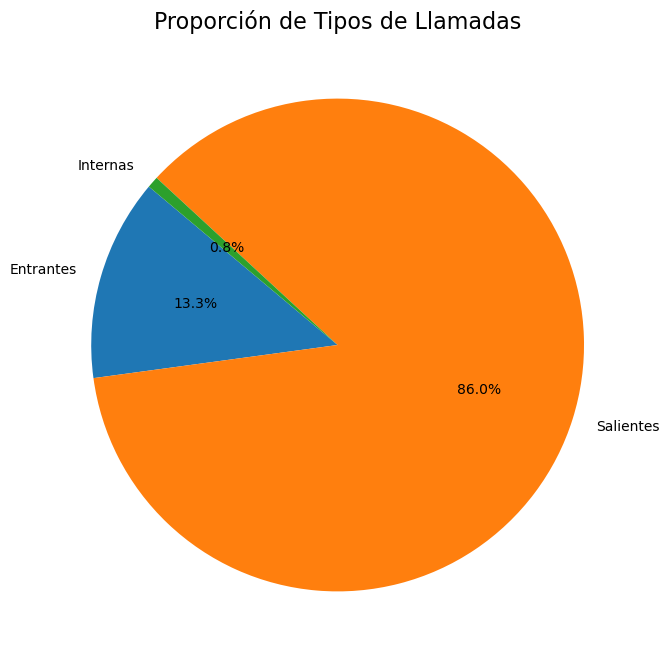

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(
    valores, 
    labels=categorias, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
)
plt.title('Proporción de Tipos de Llamadas', fontsize=16)
plt.title('Proporción de Tipos de Llamadas', fontsize=16)

-Promedio de duración de la llamada (sin el tiempo de espera)

In [60]:
average_call_duration_by_operator = dataset_cleaned.groupby('operator_id')['call_duration'].mean().round(2)

In [61]:
average_call_duration_by_operator = average_call_duration_by_operator.reset_index()
average_call_duration_by_operator.columns = ['operator_id', 'average_call_duration']

In [62]:
print(average_call_duration_by_operator)

      operator_id  average_call_duration
0        879896.0                 545.83
1        879898.0                1133.88
2        880020.0                 112.25
3        880022.0                 216.39
4        880026.0                 842.45
...           ...                    ...
1087     972410.0                 944.25
1088     972412.0                 699.60
1089     972460.0                 174.00
1090     973120.0                   2.50
1091     973286.0                  17.00

[1092 rows x 2 columns]


-Cálculo del Tiempo de espera

In [63]:
dataset_cleaned['wait_time'] = dataset_cleaned['total_call_duration'] - dataset_cleaned['call_duration']

In [64]:
print(dataset_cleaned[['total_call_duration', 'call_duration', 'wait_time']].head())

   total_call_duration  call_duration  wait_time
1                    5              0          5
2                    1              0          1
3                   18             10          8
4                   25              0         25
5                   29              3         26


-Promedio de tiempo de espera por operador

In [65]:
average_wait_time_per_operator = dataset_cleaned.groupby('operator_id')['wait_time'].mean().reset_index()

In [66]:
average_wait_time_per_operator.columns = ['operator_id', 'avg_wait_time']

In [67]:
average_wait_time_per_operator

,operator_id,avg_wait_time
0,879896.0,104.914530
1,879898.0,457.696035
2,880020.0,14.000000
3,880022.0,53.971429
4,880026.0,121.978022
...,...,...
1087,972410.0,374.500000
1088,972412.0,210.000000
1089,972460.0,88.571429
1090,973120.0,10.000000


In [68]:
average_wait_time_per_operator.describe()

,operator_id,avg_wait_time
count,1092.000000,1092.000000
mean,925517.543956,216.086098
std,22854.532209,506.996689
min,879896.000000,0.000000
25%,906393.500000,23.000000
50%,925105.000000,46.619048
75%,944211.500000,159.758929
max,973286.000000,5805.027397


-Porcentaje de llamadas perdidas

In [69]:
missed_calls = dataset_cleaned[dataset_cleaned['is_missed_call'] == True]['calls_count'].sum()

In [70]:
total_calls = dataset_cleaned['calls_count'].sum()

In [71]:
missed_calls_percentage = (missed_calls / total_calls) * 100

In [72]:
print(f"Porcentaje de llamadas perdidas: {missed_calls_percentage:.2f}%")

Porcentaje de llamadas perdidas: 38.78%


-Porcentaje de llamadas perdidas por operador

In [73]:
operator_calls = dataset_cleaned.groupby('operator_id', as_index=False).agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', lambda x: (x == True).sum())
)

In [74]:
operator_calls['missed_call_percentage_operator'] = (operator_calls['missed_calls'] / operator_calls['total_calls']) * 100

In [75]:
operator_calls

,operator_id,total_calls,missed_calls,missed_call_percentage_operator
0,879896.0,930,47,5.053763
1,879898.0,7313,89,1.217011
2,880020.0,45,6,13.333333
3,880022.0,197,29,14.720812
4,880026.0,2232,87,3.897849
...,...,...,...,...
1087,972410.0,77,2,2.597403
1088,972412.0,61,2,3.278689
1089,972460.0,51,3,5.882353
1090,973120.0,3,1,33.333333


In [76]:
operator_calls.describe()

,operator_id,total_calls,missed_calls,missed_call_percentage_operator
count,1092.000000,1092.000000,1092.000000,1092.000000
mean,925517.543956,642.989927,12.921245,10.110073
std,22854.532209,2889.666021,18.394028,16.885686
min,879896.000000,1.000000,0.000000,0.000000
25%,906393.500000,10.000000,1.000000,0.830640
50%,925105.000000,72.000000,5.000000,4.365317
75%,944211.500000,493.750000,18.000000,12.102884
max,973286.000000,60221.000000,119.000000,100.000000


-Visualización del desempeño de los operadores:

In [77]:
llamadas_perdidas_operador = operator_calls['missed_call_percentage_operator']
promedio_tiempo_espera= average_wait_time_per_operator['avg_wait_time']
total_llamadas_salientes = total_outcoming_calls_by_operator['total_outcoming_calls']

In [78]:
desempeño_operadores = pd.DataFrame({
    'Porcentaje_Perdidas': llamadas_perdidas_operador,
    'Promedio_Tiempo_Espera': promedio_tiempo_espera,
    'Volumen_Llamadas_Salientes': total_llamadas_salientes
})

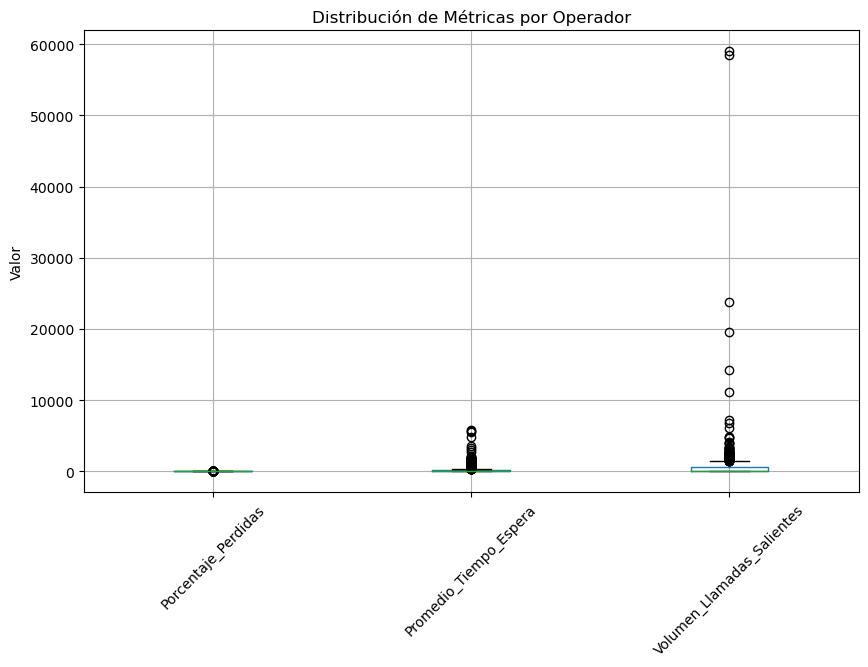

In [79]:
desempeño_operadores[['Porcentaje_Perdidas', 'Promedio_Tiempo_Espera', 'Volumen_Llamadas_Salientes']].boxplot(figsize=(10, 6))
plt.title('Distribución de Métricas por Operador')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Observaciones: 

**Porcentaje de Pérdidas:**

La mayoría de los operadores tienen un porcentaje de pérdidas relativamente bajo, cercano a cero.
Sin embargo, hay un par de operadores con valores atípicos (outliers) significativamente más altos, lo que sugiere que podrían estar experimentando problemas de capacidad o eficiencia en la atención de llamadas.

**Promedio de Tiempo de Espera:**

Los tiempos de espera promedio varían considerablemente entre los operadores.
Hay un grupo de operadores con tiempos de espera muy bajos, lo que indica una atención eficiente y rápida.
Por otro lado, existe un grupo con tiempos de espera más elevados, lo que podría ser señal de congestión en las líneas o de problemas en la asignación de llamadas.

**Volumen de Llamadas Salientes:**

El volumen de llamadas salientes muestra una gran dispersión entre los operadores.
Hay operadores con un volumen muy bajo de llamadas salientes, mientras que otros tienen un volumen significativamente más alto. Esta variabilidad puede deberse a diferentes roles o responsabilidades asignadas a cada operador.

# 3.Definición de Ineficacia de un operador

Definir los umbrales para evaluar la ineficacia de un operador puede lograrse estableciendo reglas basadas en los datos de distribución de cada métrica relevante: el porcentaje de llamadas perdidas, el promedio de tiempo de espera y las llamadas salientes.                                                

**Porcentaje de llamadas perdidas (missed_call_percentage_operator)**
Este indicador mide la capacidad del operador para manejar llamadas. Valores altos indican ineficiencia.                                                
**Umbral bajo:** Operadores con un porcentaje de llamadas perdidas por debajo del 25% de los datos (percentil 25). En este caso: 0.83%.                 
**Rango aceptable:** Operadores cuyo porcentaje está entre el percentil 25 y el percentil 75 (0.83% a 12.10%).                                          
**Umbral alto (ineficaz):** Operadores con un porcentaje superior al percentil 75 (12.10%).                                                             
Clasificación:
Ineficaz: missed_call_percentage_operator > 12.10%

**Promedio de tiempo de espera (avg_wait_time)**
El tiempo promedio de espera es un indicador de la rapidez con que un operador maneja las llamadas.                                                     
**Umbral bajo:** Tiempo por debajo del percentil 25 (23 segundos).                                                                                      
**Rango aceptable:** Tiempo entre el percentil 25 y el percentil 75 (23 a 159.76 segundos).                                                             
**Umbral alto (ineficaz):** Tiempo superior al percentil 75 (159.76 segundos).                                                                          
Clasificación:                                                                                                                                          
Ineficaz: avg_wait_time > 159.76 segundos                                                                                                               

**Número de llamadas salientes (total_outcoming_calls)**                                                                                                
Un número bajo de llamadas salientes puede indicar baja actividad o productividad del operador.                                                         
**Umbral bajo (ineficaz):** Operadores con menos llamadas salientes que el percentil 25 (11 llamadas).                                                  
**Rango aceptable:** Operadores con llamadas salientes entre el percentil 25 y el percentil 75 (11 a 597.25 llamadas).                                 
**Umbral alto:** Operadores con más de 597.25 llamadas salientes.                                                                                       
Clasificación:                                                                                                                                          
Ineficaz: total_outcoming_calls < 11 llamadas                                                                                                           

-Agrupar operadores por desempeño

In [80]:
operator_calls['efficiency_status'] = 'Efficient' 

In [81]:
operator_calls.loc[
    (operator_calls['missed_call_percentage_operator'] > 12.10) |
    (average_wait_time_per_operator['avg_wait_time'] > 159.76) |
    (total_outcoming_calls_by_operator['total_outcoming_calls'] < 11),
    'efficiency_status'
] = 'Inefficient'

In [82]:
efficient_operators = operator_calls[operator_calls['efficiency_status'] == 'Efficient']
inefficient_operators = operator_calls[operator_calls['efficiency_status'] == 'Inefficient']

In [83]:
print("Operadores eficientes:")
print(efficient_operators)

print("\nOperadores ineficientes:")
print(inefficient_operators)

Operadores eficientes:
      operator_id  total_calls  missed_calls  missed_call_percentage_operator  \
0        879896.0          930            47                         5.053763   
4        880026.0         2232            87                         3.897849   
10       882680.0           99             3                         3.030303   
11       882684.0         1274            54                         4.238619   
16       883898.0            1             0                         0.000000   
...           ...          ...           ...                              ...   
1073     969600.0           19             0                         0.000000   
1083     971100.0            3             0                         0.000000   
1085     971354.0            6             0                         0.000000   
1089     972460.0           51             3                         5.882353   
1091     973286.0            2             0                         0.000000   

    

In [84]:
efficiency_counts = operator_calls['efficiency_status'].value_counts()

-Visualización de métricas de los operadores

C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_24296\472192868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency_counts.index, y=efficiency_counts.values, palette='viridis')


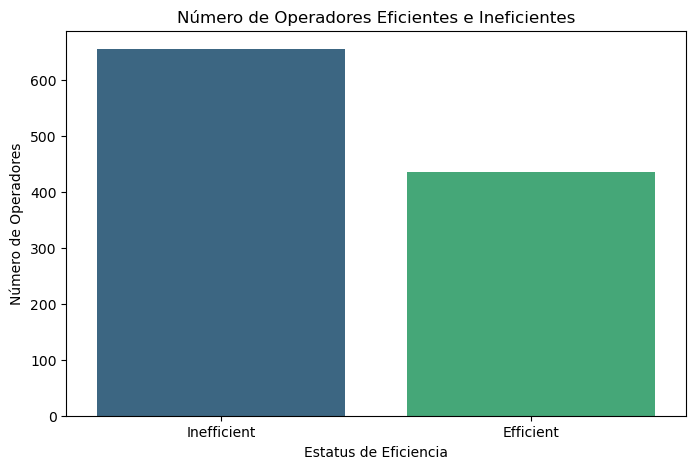

In [85]:
plt.figure(figsize=(8, 5))
sns.barplot(x=efficiency_counts.index, y=efficiency_counts.values, palette='viridis')
plt.title("Número de Operadores Eficientes e Ineficientes")
plt.xlabel("Estatus de Eficiencia")
plt.ylabel("Número de Operadores")
plt.show()

La barra que representa a los operadores ineficientes es casi el doble de alta que la de los eficientes.Esto sugiere un posible problema de productividad o desempeño general dentro del equipo o proceso.

In [86]:
merged_data = operator_calls.merge(dataset_cleaned, on='operator_id', how='inner')

In [87]:
client_operator = merged_data.merge(clientes, on='user_id', how='inner')

In [88]:
client_operator

,operator_id,total_calls,missed_calls,missed_call_percentage_operator,efficiency_status,user_id,date,direction,internal,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,tariff_plan,date_start
0,879896.0,930,47,5.053763,Efficient,166406,2019-08-02 00:00:00+03:00,out,False,True,8,0,139,139,B,2019-08-02
1,879896.0,930,47,5.053763,Efficient,166406,2019-08-02 00:00:00+03:00,out,True,False,2,24,36,12,B,2019-08-02
2,879896.0,930,47,5.053763,Efficient,166406,2019-08-02 00:00:00+03:00,out,False,False,3,7,110,103,B,2019-08-02
3,879896.0,930,47,5.053763,Efficient,166406,2019-08-03 00:00:00+03:00,out,False,False,3,48,113,65,B,2019-08-02
4,879896.0,930,47,5.053763,Efficient,166406,2019-08-03 00:00:00+03:00,in,False,False,1,6,15,9,B,2019-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41541,972460.0,51,3,5.882353,Efficient,166940,2019-11-28 00:00:00+03:00,out,False,False,18,1089,1266,177,C,2019-08-26
41542,972460.0,51,3,5.882353,Efficient,166940,2019-11-28 00:00:00+03:00,out,False,True,21,0,281,281,C,2019-08-26
41543,973120.0,3,1,33.333333,Inefficient,167923,2019-11-27 00:00:00+03:00,out,False,True,2,0,1,1,C,2019-10-07
41544,973120.0,3,1,33.333333,Inefficient,167923,2019-11-27 00:00:00+03:00,out,False,False,1,5,24,19,C,2019-10-07


# Prueba de Hipótesis Estadísticas

**-Evaluar si los tiempos de espera están correlacionados con el porcentaje de llamadas perdidas.**

Hipótesis Nula (H₀):No hay correlación significativa entre los tiempos de espera y el porcentaje de llamadas perdidas.
(Coeficiente de correlación = 0)

Hipótesis Alternativa (H₁):
Existe una correlación significativa entre los tiempos de espera y el porcentaje de llamadas perdidas.
(Coeficiente de correlación ≠ 0)

Prueba levene

In [89]:
stat, p_value = stats.levene(desempeño_operadores['Promedio_Tiempo_Espera'], desempeño_operadores['Porcentaje_Perdidas'])

print(f"Estadístico de Levene: {stat}")
print(f"p-valor: {p_value}")


Estadístico de Levene: 148.80621327835092
p-valor: 3.701150969786992e-33


In [90]:
if p_value < 0.05:
    print("Rechazamos H₀: Las varianzas no son iguales.")
else:
    print("No se rechaza H₀: Las varianzas son iguales.")

Rechazamos H₀: Las varianzas no son iguales.


Las varianzas entre los grupos comparados no son iguales, lo que implica que hay una gran variabilidad en al menos un grupo en términos de las métricas evaluadas (como tiempo de espera o porcentaje de llamadas perdidas).

Prueba de Correlación

In [91]:
corr, p_value = stats.spearmanr(desempeño_operadores['Promedio_Tiempo_Espera'], desempeño_operadores['Porcentaje_Perdidas'])

print(f"Coeficiente de correlación de Spearman: {corr}")
print(f"p-valor: {p_value}")

if p_value < 0.05:
    print("Rechazamos H₀: Existe una correlación significativa.")
else:
    print("No se rechaza H₀: No hay correlación significativa.")


Coeficiente de correlación de Spearman: -0.2820559244093409
p-valor: 2.027639196627162e-21
Rechazamos H₀: Existe una correlación significativa.


Existe una correlación significativa entre las variables evaluadas, pero es débil. Esto significa que a medida que una variable aumenta, la otra tiende a disminuir ligeramente, aunque la relación no es muy fuerte.


**-Analizar si las características del cliente (plan tarifario, antigüedad) afectan el desempeño de los operadores.**

-Plan tarifario (variable categórica)

H₀ (nula): No hay diferencia significativa en el desempeño de los operadores entre los diferentes planes tarifarios.                                     
Hₐ (alternativa): Hay una diferencia significativa en el desempeño de los operadores entre los diferentes planes tarifarios.

In [92]:
grupo_plan_A = client_operator[client_operator['tariff_plan'] == 'A']['missed_call_percentage_operator']
grupo_plan_B = client_operator[client_operator['tariff_plan'] == 'B']['missed_call_percentage_operator']
grupo_plan_C = client_operator[client_operator['tariff_plan'] == 'C']['missed_call_percentage_operator']

-Grupo plan A Vs. Grupo plan B

Prueba levene

In [93]:
stat_levene, p_levene = stats.levene(grupo_plan_A, grupo_plan_B)
print(f"Prueba de Levene - Estadístico: {stat_levene}, p-valor: {p_levene}")

Prueba de Levene - Estadístico: 5.434587745289749, p-valor: 0.019749150928551434


In [94]:
if p_levene < 0.05:
    print("Rechazamos H₀: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No se rechaza H₀: Las varianzas son iguales.")
    equal_var = True

Rechazamos H₀: Las varianzas no son iguales.


Las varianzas en las métricas analizadas entre los clientes del plan A y del plan B son significativamente diferentes.

Prueba t

In [95]:
stat_t, p_t = stats.ttest_ind(grupo_plan_A, grupo_plan_B, equal_var=False)
print(f"Prueba t - Estadístico: {stat_t}, p-valor: {p_t}")

Prueba t - Estadístico: -17.762754808482377, p-valor: 3.5229261684111656e-70


In [96]:
if p_t < 0.05:
    print("Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.")
else:
    print("No se rechaza H₀: No hay una diferencia significativa entre los planes tarifarios.")

Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.


Los clientes de los planes A y B muestran diferencias significativas en la métrica promedio, lo cual podría implicar que el plan tarifario influye en el comportamiento o las características de los clientes.

-Grupo plan A Vs. Grupo plan C

Prueba levene

In [97]:
stat_levene, p_levene = stats.levene(grupo_plan_A, grupo_plan_C)
print(f"Prueba de Levene - Estadístico: {stat_levene}, p-valor: {p_levene}")

Prueba de Levene - Estadístico: 348.113962632116, p-valor: 3.332001841183377e-77


In [98]:
if p_levene < 0.05:
    print("Rechazamos H₀: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No se rechaza H₀: Las varianzas son iguales.")
    equal_var = True

Rechazamos H₀: Las varianzas no son iguales.


Existe una diferencia significativa en las varianzas entre los grupos del plan A y del plan C. Esto indica que los datos dentro de cada grupo tienen dispersión distinta.


Prueba t

In [99]:
stat_t, p_t = stats.ttest_ind(grupo_plan_A, grupo_plan_C, equal_var=False)
print(f"Prueba t - Estadístico: {stat_t}, p-valor: {p_t}")

Prueba t - Estadístico: 2.4128988140945795, p-valor: 0.015833455125519258


In [100]:
if p_t < 0.05:
    print("Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.")
else:
    print("No se rechaza H₀: No hay una diferencia significativa entre los planes tarifarios.")

Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.


Las métricas promedio de los grupos de clientes de los planes A y C son significativamente distintas.

-Grupo plan B Vs. Grupo plan C

Prueba levene

In [101]:
stat_levene, p_levene = stats.levene(grupo_plan_B, grupo_plan_C)
print(f"Prueba de Levene - Estadístico: {stat_levene}, p-valor: {p_levene}")

Prueba de Levene - Estadístico: 268.0074115021131, p-valor: 5.695798893347163e-60


In [102]:
if p_levene < 0.05:
    print("Rechazamos H₀: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No se rechaza H₀: Las varianzas son iguales.")
    equal_var = True

Rechazamos H₀: Las varianzas no son iguales.


Existe una diferencia significativa en las varianzas entre los grupos del plan B y del plan C. Esto indica que los datos dentro de cada grupo tienen dispersión distinta.

Prueba t

In [103]:
stat_t, p_t = stats.ttest_ind(grupo_plan_B, grupo_plan_C, equal_var=False)
print(f"Prueba t - Estadístico: {stat_t}, p-valor: {p_t}")

Prueba t - Estadístico: 22.074665170488213, p-valor: 4.4747927080142717e-107


In [104]:
if p_t < 0.05:
    print("Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.")
else:
    print("No se rechaza H₀: No hay una diferencia significativa entre los planes tarifarios.")

Rechazamos H₀: Hay una diferencia significativa entre los planes tarifarios.


Las métricas promedio de los grupos de clientes de los planes B y C son significativamente distintas.

-Antigüedad del cliente (variable numérica)

H₀ (nula): No hay diferencia significativa en el desempeño de los operadores según la antigüedad de los clientes.                                        
Hₐ (alternativa): Hay una diferencia significativa en el desempeño de los operadores según la antigüedad de los clientes.

In [105]:
client_operator['antiguedad'] = (pd.Timestamp.now() - pd.to_datetime(clientes['date_start'])).dt.days

In [106]:
mediana_antiguedad = client_operator['antiguedad'].median()
grupo_baja_antiguedad = client_operator[client_operator['antiguedad'] <= mediana_antiguedad]
grupo_alta_antiguedad = client_operator[client_operator['antiguedad'] > mediana_antiguedad]

In [107]:
grupo_baja = grupo_baja_antiguedad['missed_call_percentage_operator']
grupo_alta = grupo_alta_antiguedad['missed_call_percentage_operator']

Prueba Levene

In [108]:
stat_levene, p_levene = stats.levene(grupo_baja, grupo_alta)
print(f"Prueba de Levene - Estadístico: {stat_levene}, p-valor: {p_levene}")


Prueba de Levene - Estadístico: 12.066151417228392, p-valor: 0.0005437432166815504


In [109]:
if p_levene < 0.05:
    print("Rechazamos H₀: Las varianzas no son iguales.")
    equal_var = False
else:
    print("No se rechaza H₀: Las varianzas son iguales.")
    equal_var = True


Rechazamos H₀: Las varianzas no son iguales.


Esto indica que las varianzas no son iguales entre los grupos de operadores según la antigüedad de los clientes. Es decir, existe una diferencia significativa en la dispersión de las métricas analizadas.

Prueba t

In [110]:
stat_t, p_t = stats.ttest_ind(grupo_baja, grupo_alta, equal_var=equal_var)
print(f"Prueba t - Estadístico: {stat_t}, p-valor: {p_t}")

Prueba t - Estadístico: -5.42565682924494, p-valor: 8.182491333731489e-08


In [111]:
if p_t < 0.05:
    print("Rechazamos H₀: Hay una diferencia significativa según la antigüedad del cliente.")
else:
    print("No se rechaza H₀: No hay una diferencia significativa según la antigüedad del cliente.")

Rechazamos H₀: Hay una diferencia significativa según la antigüedad del cliente.


El valor negativo del estadístico t sugiere que, en promedio, el desempeño de los operadores varía negativamente con la antigüedad del cliente (es decir, los operadores podrían estar desempeñándose peor con clientes más antiguos).

# Conclusiones y recomendaciones

**Conclusión del Proyecto**

El análisis realizado permitió identificar factores clave que afectan el desempeño de los operadores, tomando en cuenta métricas específicas, características de los clientes y diferencias significativas en el comportamiento operativo. Las principales conclusiones son:

**Distribución de llamadas y desempeño general de los operadores**

El 86% de las llamadas realizadas por los operadores fueron salientes, mientras que el 13% fueron entrantes y solo el 0.8% internas.
Se establecieron umbrales para clasificar a los operadores como eficientes o ineficientes. Los operadores ineficientes representan casi el doble de los eficientes, lo que señala un posible problema generalizado de productividad o desempeño en el equipo.

**Correlación entre tiempos de espera y porcentaje de llamadas perdidas**

Existe una correlación significativa, aunque débil, entre estas variables. Esto indica que los tiempos de espera y el porcentaje de llamadas perdidas están relacionados, pero no de manera fuerte o determinante.

**Impacto de las características del cliente en el desempeño de los operadores**

**Plan tarifario:** Se encontraron diferencias significativas en las varianzas y medias entre los diferentes planes tarifarios (A, B y C). Esto sugiere que el tipo de plan tarifario del cliente influye en el comportamiento y desempeño de los operadores.
**Antigüedad del cliente:** La antigüedad del cliente afecta significativamente el desempeño de los operadores. Las diferencias en varianzas y promedios sugieren que los clientes más antiguos pueden tener necesidades específicas o estar sujetos a sesgos operativos.

**Sugerencias y Recomendaciones**

**Optimización del desempeño de los operadores**

Implementar capacitaciones específicas para los operadores clasificados como ineficientes, enfocándose en la reducción de tiempos de espera y mejora en la atención a clientes.
Introducir incentivos para los operadores eficientes y programas de monitoreo continuo que identifiquen áreas de mejora en tiempo real.

**Reducción de tiempos de espera y llamadas perdidas**

Revisar los flujos operativos y ajustar la distribución de carga laboral entre operadores para reducir el tiempo de espera en picos de alta demanda.
Incorporar herramientas tecnológicas, como sistemas de respuesta automática, para atender llamadas entrantes rápidamente cuando no haya disponibilidad inmediata de operadores.

**Plan tarifario y personalización del servicio**

Analizar en mayor detalle las diferencias entre los planes tarifarios y ajustar las estrategias operativas según las características de cada grupo de clientes.Ofrecer capacitaciones específicas para que los operadores comprendan mejor las necesidades de los clientes según su plan tarifario.

**Antigüedad del cliente**

Realizar un análisis adicional sobre el impacto de la antigüedad de los clientes en las interacciones con los operadores. Esto podría incluir entrevistas o encuestas con clientes antiguos para identificar áreas de mejora en el servicio.
Personalizar el trato hacia los clientes más antiguos, asegurándose de atender sus necesidades específicas y reducir cualquier posible sesgo.

**Automatización y redistribución del trabajo**

Implementar tecnologías de automatización en procesos operativos recurrentes para reducir la carga de trabajo manual en los operadores.
Redistribuir las llamadas entrantes y salientes de manera más equitativa para garantizar una experiencia homogénea para los clientes de diferentes planes tarifarios.

Con estas acciones, se espera no solo mejorar el desempeño de los operadores, sino también optimizar la experiencia del cliente y aumentar la eficiencia operativa general.









# Fuentes Consultadas

**-Documentación sobre análisis exploratorio de datos**

Pregunta: ¿Cuáles son las mejores prácticas para realizar un EDA en datasets grandes?

Fuente: Towards Data Science. (n.d.). Exploratory Data Analysis. Recuperado de https://towardsdatascience.com

**-Documentación oficial de pandas y matplotlib**

Pregunta: ¿Cómo manipular y graficar datos eficientemente para analizar métricas específicas?

Fuente: Pandas Development Team. (n.d.). pandas documentation. Recuperado de https://pandas.pydata.org/docs

Matplotlib Development Team. (n.d.). Matplotlib documentation. Recuperado de https://matplotlib.org/stable/contents.html

**-Artículos sobre métricas de efectividad en call centers**

Pregunta: ¿Qué métricas son estándar para evaluar la efectividad de operadores?

Fuente: Call Center Helper. (n.d.). Blog on call center metrics. Recuperado de https://www.callcentrehelper.com

**-Documentación sobre clustering y clasificación**

Pregunta: ¿Cómo identificar grupos o tendencias en datos de desempeño?

Fuente: Analytics Vidhya. (n.d.). A Guide to Clustering in Python. Recuperado de https://www.analyticsvidhya.com

**-Técnicas de prueba de hipótesis**

Pregunta: ¿Qué métodos estadísticos son adecuados para validar relaciones entre variables?

Fuente: Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. O'Reilly Media.

**-Investigación sobre análisis de datos en telecomunicaciones**

Pregunta: ¿Cómo se utiliza el análisis de datos para optimizar operaciones en la industria de telecomunicaciones?

Fuente: Springer. (n.d.). Data Analysis in Telecommunications. Recuperado de https://link.springer.com

**-Uso de criterios de ineficiencia en operaciones**

Pregunta: ¿Qué niveles de rendimiento se consideran bajos en términos de llamadas perdidas o tiempos de espera?

Fuente: Deloitte. (n.d.). Reporte de métricas de call centers. Recuperado de https://www2.deloitte.com